In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Load the Spotify dataset
# Ensure the .csv file is in the correct directory or provide a full path to the file
tracks_df = pd.read_csv("C:\BrownPrecollege\spotify_tracks.csv")

In [3]:
tracks_df.describe()


,Unnamed: 0,acousticness,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_number,valence
count,101939.000000,101939.000000,101939.000000,101939.000000,1.019390e+05,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000
mean,50969.000000,0.352124,0.586015,1.032166,2.467708e+05,0.586479,0.148776,5.270858,0.197640,-9.462720,0.618154,39.782311,0.128841,118.358527,3.875651,4.608060,0.482813
std,29427.398883,0.334855,0.177724,0.566789,1.904303e+05,0.260170,0.304024,3.577679,0.175391,6.198508,0.485841,16.790769,0.203324,30.224074,0.517008,7.181805,0.261690
min,0.000000,0.000000,0.000000,1.000000,1.155000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,25484.500000,0.040700,0.480000,1.000000,1.840000e+05,0.411000,0.000000,2.000000,0.095600,-11.149000,0.000000,29.000000,0.036400,95.973000,4.000000,1.000000,0.271000
50%,50969.000000,0.238000,0.610000,1.000000,2.168930e+05,0.629000,0.000037,5.000000,0.124000,-7.599000,1.000000,41.000000,0.050600,118.067000,4.000000,2.000000,0.477000
75%,76453.500000,0.645000,0.714000,1.000000,2.610550e+05,0.798000,0.034400,8.000000,0.241000,-5.509000,1.000000,52.000000,0.104000,136.045000,4.000000,6.000000,0.693000
max,101938.000000,0.996000,0.989000,81.000000,5.505831e+06,1.000000,1.000000,11.000000,0.999000,2.719000,1.000000,97.000000,0.969000,244.035000,5.000000,655.000000,0.993000


In [5]:
tracks_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101939 entries, 0 to 101938
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         101939 non-null  int64  
 1   acousticness       101939 non-null  float64
 2   album_id           101939 non-null  object 
 3   analysis_url       101939 non-null  object 
 4   artists_id         101939 non-null  object 
 5   available_markets  101939 non-null  object 
 6   country            101939 non-null  object 
 7   danceability       101939 non-null  float64
 8   disc_number        101939 non-null  float64
 9   duration_ms        101939 non-null  float64
 10  energy             101939 non-null  float64
 11  href               101939 non-null  object 
 12  id                 101939 non-null  object 
 13  instrumentalness   101939 non-null  float64
 14  key                101939 non-null  float64
 15  liveness           101939 non-null  float64
 16  lo

In [6]:
tracks_df.head()


,Unnamed: 0,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,preview_url,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type
0,0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,...,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track
1,1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,...,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track
2,2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,492840.0,...,https://p.scdn.co/mp3-preview/c8af28fb15185b18...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track
3,3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,...,https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track
4,4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,1.0,558880.0,...,https://p.scdn.co/mp3-preview/32be593c0eb82868...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track


In [7]:
# Select only necessary features for clustering
tracks = tracks_df[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]


In [8]:
# Initialize the KMeans model with 5 clusters
# We can adjust the number of clusters based on our understanding of the data
kmeans = KMeans(n_clusters=5)

In [9]:
# Train the model with our data
kmeans.fit(tracks)

C:\Users\Rinah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [10]:
# Add a new column 'type' to the dataframe. This column will contain the cluster number each track belongs to.
tracks_df["type"] = kmeans.labels_

In [16]:
# Save the dataframe with cluster information as a new CSV file
tracks_df.to_csv("result.csv", index=False)

# Load the updated data with cluster info
tracks = pd.read_csv("result.csv")

In [22]:
# Prompt the user to enter their favorite songs' ids
ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')

# Filter the dataframe to get the user's favorite songs
favorites = tracks[tracks['id'].isin(ids)]

Enter comma-separated ids of your favorite songs
> 3VAX2MJdmdqARLSU5hPMpm


In [23]:
# Find out the most frequent cluster among the user's favorite songs
clusters = favorites['type'].value_counts()
user_favorite_cluster = clusters.idxmax()

print('\nFavorite cluster:', user_favorite_cluster, '\n')


Favorite cluster: 3 



In [32]:
# Get the songs that belong to the user's favorite cluster
suggestions = tracks[tracks['type'] == user_favorite_cluster]

# Print the first 5 song suggestions
print(suggestions.head())

# Ask the user how many song suggestions they would like to see
num_suggestions = int(input('How many song suggestions would you like to see?\n> '))

# Print the song suggestions based on user's preference
if num_suggestions >= len(suggestions):
    print(suggestions)
else:
    print(suggestions.head(num_suggestions))

   Unnamed: 0  acousticness                album_id  \
1           1         0.863  1bcqsH5UyTBzmh9YizdsBE   
2           2         0.750  4tKijjmxGClg4JOLAyo2qE   
3           3         0.763  6FeJF5r8roonnKraJxr4oB   
4           4         0.770  4tKijjmxGClg4JOLAyo2qE   
5           5         0.971  7CCwkPweMxKq8yWkVerH6T   

                                        analysis_url  \
1  https://api.spotify.com/v1/audio-analysis/3VAX...   
2  https://api.spotify.com/v1/audio-analysis/1L3Y...   
3  https://api.spotify.com/v1/audio-analysis/6aCe...   
4  https://api.spotify.com/v1/audio-analysis/1Vo8...   
5  https://api.spotify.com/v1/audio-analysis/4PrA...   

                   artists_id  \
1  ['4xWMewm6CYMstu0sPgd9jJ']   
2  ['3hYaK5FF3YAglCj5HZgBnP']   
3  ['2KQsUB9DRBcJk17JWX1eXD']   
4  ['3hYaK5FF3YAglCj5HZgBnP']   
5  ['3kzwYV3OCB010YfXMF0Avt']   

                                   available_markets country  danceability  \
1  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   

In [ ]:
# Iterate through the suggested songs and collect feedback
for index, song in suggestions.head(num_suggestions).iterrows():
    
    #ask if they would like to provide feedback at all
    continue_feedback = input("Would you like to provide some feedback on the features of the reccomended songs we provided?(yes/no)\n").lower()
    if continue_feedback == 'no':
        break
    
    print("for", song['artists_id'], "how would you rate these features? On a scale from 0-1")
    #ask for different features, and how they would rate it
    print(input("acousticness:"))
    
    print(input("dancebility"))
    
    print(input("energy:"))
    
    print(input("instrumentalness:"))
    
    print(input("liveness:"))
    
    print(input("speechiness:"))
    
    print(input("valence:"))
          
    print("For the song by", song['artists_id'], "would you like to provide any feedback, so we can improve future suggestions?")    
    # You can also ask for more specific feedback if needed
    print("Feedback (optional):")
    
    feedback = input("> ")
        
    print(f"Feedback for {song['artists_id']}: Feedback - {feedback}")
    
    print("\nThank you for providing feedback!")



Would you like to provide some feedback on the features of the reccomended songs we provided?(yes/no)
yes
for ['4xWMewm6CYMstu0sPgd9jJ'] how would you rate these features? On a scale from 0-1
acousticness:.4
.4
dancebility.2
.2
energy:.3
.3
instrumentalness:.4
.4
liveness:.4
.4
speechiness:.4
.4
valence:.4
.4
For the song by ['4xWMewm6CYMstu0sPgd9jJ'] would you like to provide any feedback, so we can improve future suggestions?
Feedback (optional):
> .4
Feedback for ['4xWMewm6CYMstu0sPgd9jJ']: Feedback - .4

Thank you for providing feedback!
Would you like to provide some feedback on the features of the reccomended songs we provided?(yes/no)
.4
for ['3hYaK5FF3YAglCj5HZgBnP'] how would you rate these features? On a scale from 0-1
acousticness:.4
.4
dancebility.4
.4


C:\Users\Rinah\AppData\Local\Temp\ipykernel_3676\2440674851.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  tracks_df.hist(ax=ax, bins = 30)


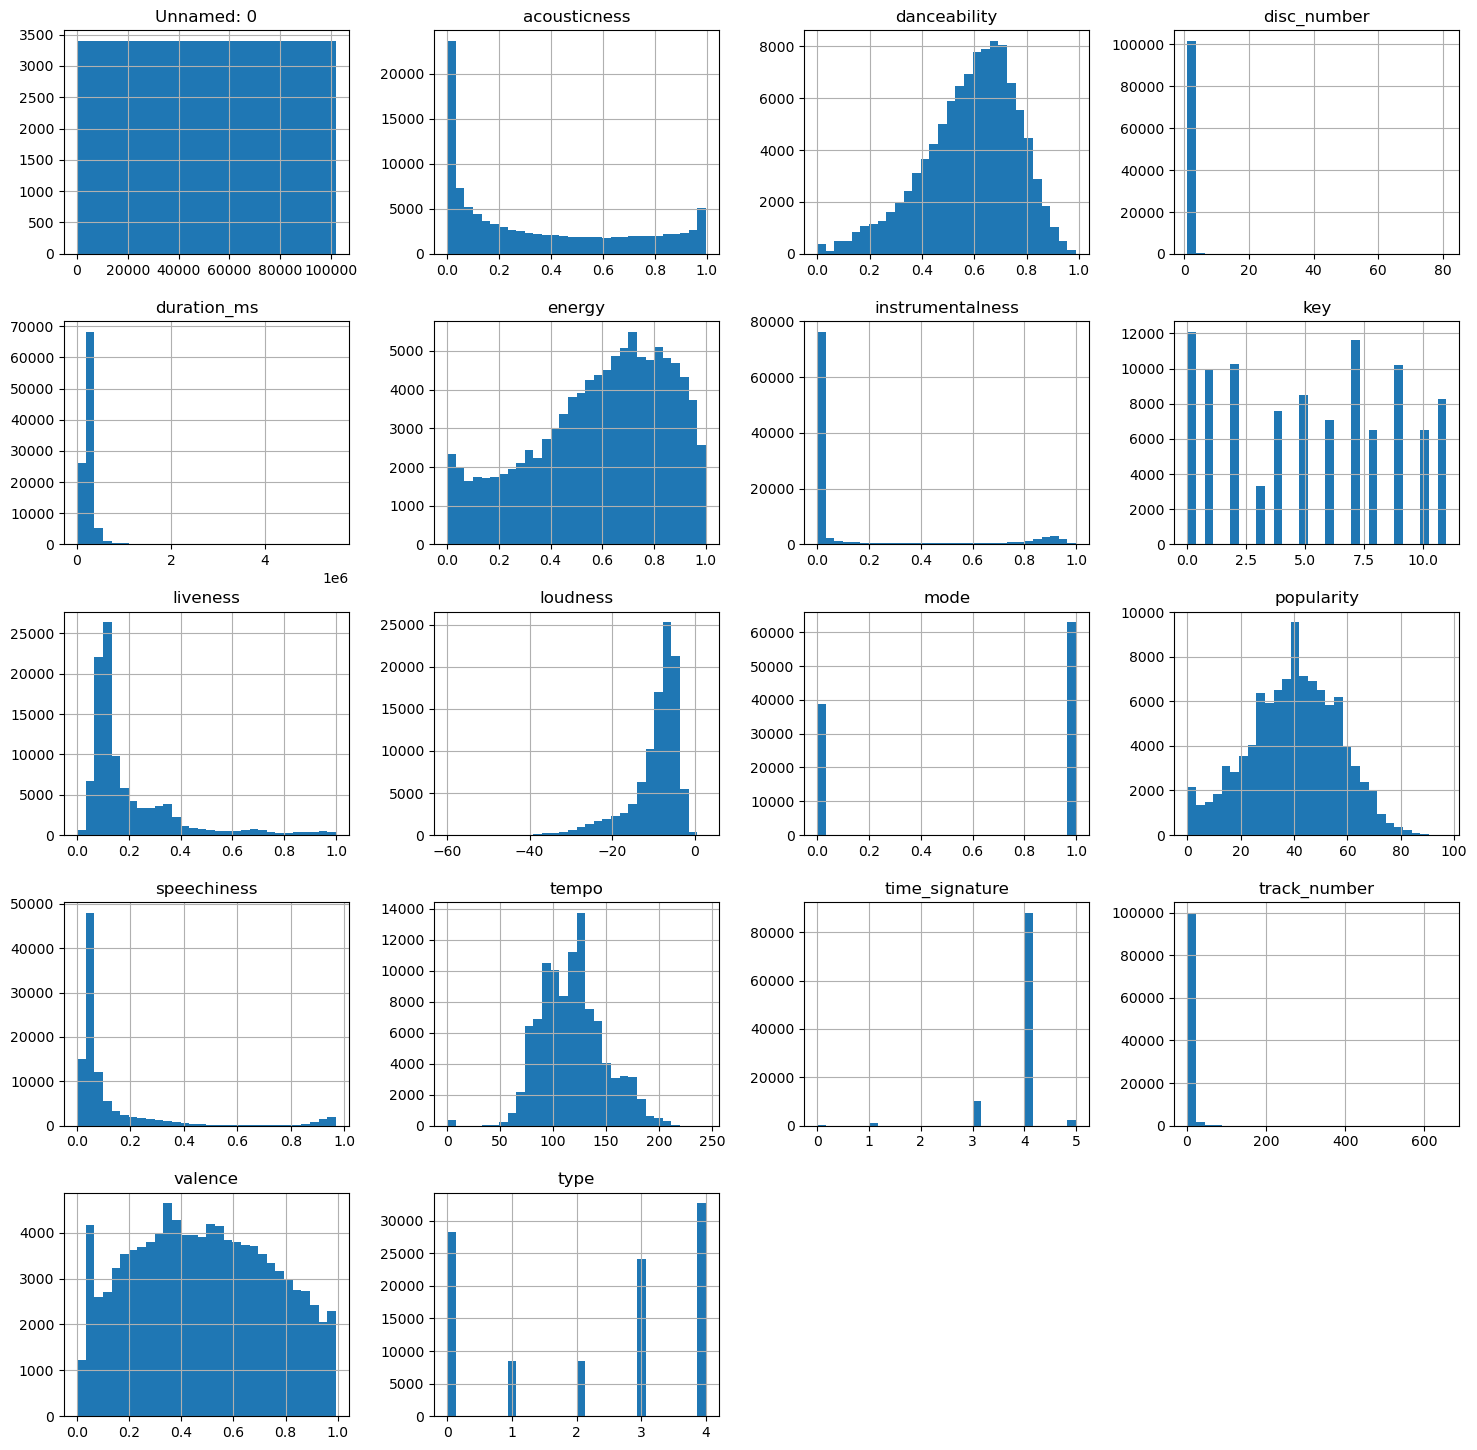

In [25]:
fig = plt.figure(figsize=(18,18))
ax = fig.gca()
tracks_df.hist(ax=ax, bins = 30)
plt.show()

C:\Users\Rinah\AppData\Local\Temp\ipykernel_3676\1474195076.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = tracks_df.corr()


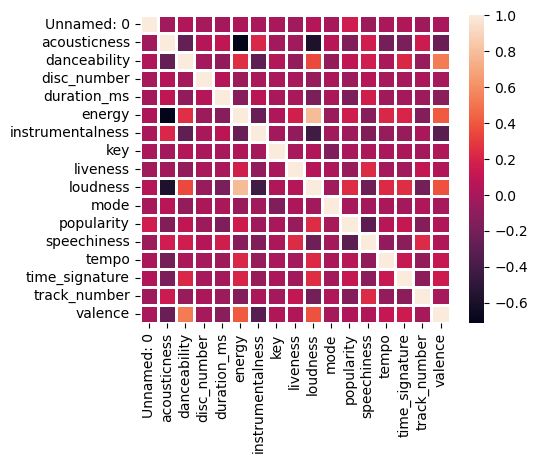

In [28]:
# # calculate the correlation matrix
corr = tracks_df.corr()

#object columns to exclude 
columns_to_exclude=['album_id', 'analysis_url', 'artists_id', 'available_markets', 'country', 'href', 'id', 'lyrics','name', 'playlist', 'preview_url', 'track_href', 'track_name_prev', 'uri', 'type']

tracks_df_filtered = tracks_df.drop(columns=columns_to_exclude)

corr = tracks_df_filtered.corr()

# plot the heatmap
fig = plt.figure(figsize=(5,4))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75)

plt.show()

In [29]:
print(corr)

                  Unnamed: 0  acousticness  danceability  disc_number  \
Unnamed: 0          1.000000     -0.030906      0.026523    -0.009223   
acousticness       -0.030906      1.000000     -0.270211     0.045242   
danceability        0.026523     -0.270211      1.000000    -0.012023   
disc_number        -0.009223      0.045242     -0.012023     1.000000   
duration_ms        -0.012470      0.090509     -0.086851     0.047136   
energy              0.021046     -0.715392      0.249542    -0.049685   
instrumentalness   -0.000240      0.209567     -0.286676     0.000116   
key                -0.002134     -0.017941      0.037420    -0.001945   
liveness           -0.030715     -0.028647     -0.073848     0.001004   
loudness            0.042044     -0.583019      0.345126    -0.059239   
mode               -0.009404      0.064972     -0.072409     0.005703   
popularity          0.160131     -0.154408      0.092382    -0.047331   
speechiness        -0.049428      0.159875      0.1

In [30]:
sklearn.metrics.accuracy_score()

NameError: name 'sklearn' is not defined